# Multilayer Neural Network

**Introduction**

Multilayer Neural Networks, specifically Multi-Layer Perceptrons (MLPs), are a class of artificial neural networks designed to address complex nonlinear relationships in data. They consist of multiple layers of interconnected neurons or units, comprising an input layer, one or more hidden layers, and an output layer. Each neuron in one layer is connected to every neuron in the subsequent layer, allowing for sophisticated information processing.

**Algorithm**

- Forward Propagation: Input data is passed through the network layer by layer, with each neuron applying a weighted sum of inputs followed by an activation function to produce an output.
- Backward Propagation (Training): Error is calculated between the predicted output and actual output, and this error is propagated backward through the network. The weights are adjusted using optimization techniques like gradient descent to minimize this error, updating the model for better performance.
- Activation Functions: Neurons often use nonlinear activation functions (e.g., ReLU, Sigmoid, Tanh) to introduce nonlinearities, allowing the network to learn complex patterns.

**Advantages**

- Nonlinearity: Ability to learn and model complex nonlinear relationships in data.
- Adaptability: Suitable for a wide range of problems, including regression, classification, and pattern recognition.
- Feature Learning: Can automatically extract and learn features from raw data.
- Generalization: Can generalize well to new, unseen data when properly trained.

**Disadvantages**

- Complexity: Training and tuning can be computationally expensive, especially for large datasets and deep architectures.
- Overfitting: Susceptible to overfitting, especially with insufficient data or overly complex architectures.
- Hyperparameter Sensitivity: The performance of an MLP can be sensitive to the choice of hyperparameters.
- Interpretability: Interpretability of the learned features and decision-making process can be challenging, especially in deep architectures.

Multilayer Neural Networks have been instrumental in various fields, including image and speech recognition, natural language processing, and finance, owing to their ability to handle complex data relationships and learn intricate patterns.

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist  # Importing the Fashion MNIST dataset from Keras
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns  # Seaborn for data visualization


In [10]:
class MultilayerPerceptron():

    def __init__(self, layers = [784, 60, 60, 10], actFun_type='relu'):
        self.actFun_type = actFun_type
        self.layers = layers
        self.L = len(self.layers)
        self.W =[[0.0]]
        self.B = [[0.0]]
        for i in range(1, self.L):
            w_temp = np.random.randn(self.layers[i], self.layers[i-1]) * np.sqrt(2/self.layers[i-1])
            b_temp = np.random.randn(self.layers[i], 1) * np.sqrt(2/self.layers[i-1])

            self.W.append(w_temp)
            self.B.append(b_temp)

    def reset_weights(self, layers = [784, 60, 60, 10]):
        self.layers = layers
        self.L = len(self.layers)
        self.W = [[0.0]]
        self.B = [[0.0]]
        for i in range(1, self.L):
            w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
            b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

            self.W.append(w_temp)
            self.B.append(b_temp)

    def forward_pass(self, p, predict_vector = False):
        Z =[[0.0]]
        A = [p[0]]
        for i in range(1, self.L):
            z = (self.W[i] @ A[i-1]) + self.B[i]
            a = self.actFun(z, self.actFun_type)
            Z.append(z)
            A.append(a)

        if predict_vector == True:
            return A[-1]
        else:
            return Z, A

    def mse(self, a, y):
        return .5*sum((a[i]-y[i])**2 for i in range(10))[0]

    def MSE(self, data):
        c = 0.0
        for p in data:
            a = self.forward_pass(p, predict_vector=True)
            c += self.mse(a, p[1])
        return c/len(data)

    def actFun(self, z, type):
        if type == 'tanh':
            return np.tanh(z)
        elif type == 'sigmoid':
            return 1.0 / (1.0 + np.exp(-z))
        elif type == 'relu':
            return np.maximum(0, z)
        else:
            return None

    def diff_actFun(self, z, type):
        if type == 'tanh':
            return 1.0 - (np.tanh(z))**2
        elif type == 'sigmoid':
            return self.actFun(z, type) * (1-self.actFun(z, type))
        elif type == 'relu':
            return np.where(z > 0, 1.0, 0)
        else:
            return None

    def deltas_dict(self, p):
        Z, A = self.forward_pass(p)
        deltas = dict()
        deltas[self.L-1] = (A[-1] - p[1])*self.diff_actFun(Z[-1], self.actFun_type)
        for l in range(self.L-2, 0, -1):
            deltas[l] = (self.W[l+1].T @ deltas[l+1]) *self.diff_actFun(Z[l], self.actFun_type)

        return A, deltas

    def stochastic_gradient_descent(self, data, alpha = 0.04, epochs = 3):
        print(f"Initial Cost = {self.MSE(data)}")
        for k in range(epochs):
            for p in data:
                A, deltas = self.deltas_dict(p)
                for i in range(1, self.L):
                    self.W[i] = self.W[i] - alpha*deltas[i]@A[i-1].T
                    self.B[i] = self.B[i] - alpha*deltas[i]
        print(f"{k} Cost = {self.MSE(data)}")


    def mini_batch_gradient_descent(self, data, batch_size = 15, alpha = 0.04, epochs = 3):
        print(f"Initial Cost = {self.MSE(data)}")
        data_length = len(data)
        for k in range(epochs):
            for j in range(0, data_length-batch_size, batch_size):
                delta_list = []
                A_list = []
                for p in data[j:j+batch_size]:
                    A, deltas = self.deltas_dict(p)
                    delta_list.append(deltas)
                    A_list.append(A)

                for i in range(1, self.L):
                    self.W[i] = self.W[i] - (alpha/batch_size)*sum(da[0][i]@da[1][i-1].T for da in zip(delta_list, A_list))
                    self.B[i] = self.B[i] - (alpha/batch_size)*sum(deltas[i] for deltas in delta_list)
            print(f"{k} Cost = {self.MSE(data)}")


The Fashion MNIST dataset, sourced from Keras, comprises 60,000 training images and 10,000 test images, all in grayscale with dimensions of 28x28 pixels. This dataset categorizes images into 10 classes, each representing various fashion items. Pixel intensities range from 0 to 255, with 0 denoting black and 255 denoting white. The classes are: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, and Ankle boot, corresponding to labels 0 through 9, respectively.

In [3]:
# Load the Fashion MNIST dataset
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Check the shape of the training data
train_X.shape


(60000, 28, 28)

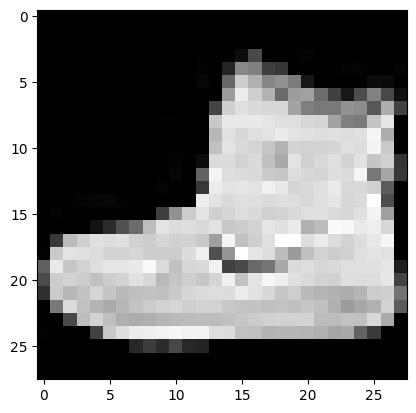

In [5]:
# Visualize the first image by putting the pixel together, and it is an Ankle boot.
plt.imshow(train_X[0], cmap="gray")
plt.show()

In [6]:
# Normalize the pixel values
train_X = train_X / 255
test_X = test_X / 255

# Reshape the first image into a column vector
train_X[0].flatten().reshape(28*28, 1).shape


(784, 1)

Next, we flatten the X matrix by storing the flattened vectors into a list. Additionally, we convert the y labels into one-hot encoded vectors, storing these vectors in a separate list.

In [7]:
# For training data
X_train = []
for x in train_X:
    X_train.append(x.flatten().reshape(28*28, 1))

# Y_train will temporarily store one-hot encoded label vectors
Y_train = []
for y in train_y:
    temp_vec = np.zeros((10, 1))
    temp_vec[y][0] = 1.0
    Y_train.append(temp_vec)

# Our training data will be stored as a list of tuples
train_data = [p for p in zip(X_train, Y_train)]

# For test data
X_test = []
for x in test_X:
    X_test.append(x.flatten().reshape(784, 1))

Y_test = []
for y in test_y:
    temp_vec = np.zeros((10, 1))
    temp_vec[y][0] = 1.0
    Y_test.append(temp_vec)

test_data = [p for p in zip(X_test, Y_test)]


Now let's train MLP's using sigmoid, hyperbolic tangent, and rectified linear activation functions by mini batch gradient descent, and compare their performances.

In [12]:
# Creating a Multilayer Perceptron network with tanh activation function
net_tanh = MultilayerPerceptron(layers=[784, 60, 60, 10], actFun_type='tanh')

# Training the network using mini-batch gradient descent
net_tanh.mini_batch_gradient_descent(train_data, batch_size = 16, alpha = 0.01, epochs = 5)


Initial Cost = 1.8734268375871235
0 Cost = 0.17598289839244208
1 Cost = 0.1536014458645318
2 Cost = 0.1423807604863392
3 Cost = 0.13510806289595845
4 Cost = 0.12976378827567026


In [13]:
net_tanh.MSE(test_data)

0.137662998829111

In [14]:
net_relu = MultilayerPerceptron(layers=[784, 100, 100, 10], actFun_type='relu')
net_relu.mini_batch_gradient_descent(train_data, batch_size = 16, alpha = 0.01, epochs = 5)

Initial Cost = 4.0522439628036215
0 Cost = 0.28877999328203924
1 Cost = 0.27821595927579257
2 Cost = 0.231931349749187
3 Cost = 0.22622454931234542
4 Cost = 0.21117080307810557


In [15]:
net_relu.MSE(test_data)

0.2196628435012465

In [16]:
net_sig = MultilayerPerceptron(layers=[784, 100, 100, 10], actFun_type='sigmoid')
net_sig.mini_batch_gradient_descent(train_data, batch_size = 16, alpha = 0.01, epochs = 5)

Initial Cost = 1.4965798575418863
0 Cost = 0.43444793611203353
1 Cost = 0.40563935490218495
2 Cost = 0.3670997144168368
3 Cost = 0.3310898745810555
4 Cost = 0.3003986260688289


In [17]:
net_sig.MSE(test_data)

0.3014454389557486

Comparing three kinds of activation functions while keeping all other hyper-parameters unchanged, sigmoid activation function has the best perfomance on the test data.
